# **E-Commerce Customer Churn Analysis**

## Business Problem Understanding

Sebuah perusahaan di bidang E-Commerce dimana pembeli dan penjual bisa bertransaksi (melakukan penjualan/pembelian) melalui website tersebut. Transaksi pembelian dari website E-Commerce bisa datang dari berbagai kategori barang/jasa. Perusahaan Ecom mendapatkan keuntungan dari tiap transaksi yang dilakukan oleh customer, sehingga adanya pertumbuhan customer dibutuhkan agar perusahaan bisa mendapatkan lebih banyak keuntungan. Di beberapa tahun terakhir perusahaan mengalami pertumbuhan customer yang cukup baik, namun dari data terbaru mulai menunjukkan bahwa adanya peningkatan customer yang churn dari keseluruhan customer di website E-Commerce tersebut. 

Sebagai informasi, ada dua cara agar perusahaan dapat mempertahankan pertumbuhan keuntungan. Pertama yaitu mempertahankan customer lama agar menetap sebagai customer. Cara kedua yaitu mencari customer baru. Berdasarkan statistik dari berbagai industri bisnis, hasil riset menemukan bahwa customer acquisition memiliki biaya 5x lipat lebih dari customer retention

Pada kesimpulannya, mendapatkan customer baru memakan biaya yang lebih banyak dibandingkan dengan mempertahankan customer lama untuk tidak churn sehingga kita harus lebih fokus ke customer retention. Sehingga, perusahaan harus memikirkan cara untuk memprediksi customer yang berpotensi untuk churn dan memberikan treatment yang diperlukan agar customer menetap di platform E-Commerce perusahaan.

Daftar Biaya Retensi Pelanggan:

Biaya staf untuk layanan pelanggan, keberhasilan pelanggan, dan manajemen akun
Biaya pemasaran yang difokuskan pada retensi pelanggan
Program loyalitas pelanggan

Kita asumsikan perusahaan per tahunnya menggelontorkan dana $100.000 untuk memaintain 1000 customer lama

Sehingga:

- **Retention Cost: $100/customer**

Sedangkan, customer acuqisition cost yang dihabiskan oleh perusahaan sebanyak $500.000 untuk mendapatkan 1000 customer baru

Sehingga:

- **Acquisition Cost: $500/customer**


### Problem Statement

Salah satu tantangan yang dihadapi oleh bisnis E-Commerce adalah untuk membuat customer agar menetap dan tetap melakukan transaksi. Perusahaan mengalami penurunan pertumbuhan customer akibat customer churn yang mengakibatkan keuntungan perusahaan stagnan/berkurang.

### Goals
Dalam banyak skenario bisnis, mempertahankan pelanggan atau mendeteksi pelanggan yang cenderung berpindah ke kompetitor bisa lebih penting daripada menarik pelanggan baru. Dalam hal ini, fokus pada recall dapat membantu mengidentifikasi pelanggan yang mungkin meninggalkan platform atau layanan kita, memungkinkan tindakan yang lebih proaktif untuk mempertahankan mereka.

### Analytic Approach

Berikut tahapan analisis yang akan kami lakukan:

Step-1: Melakukan Explarotatory Data Analyst (EDA) untuk menemukan perilaku pelanggan yang melakukan Churn.<br>
Step-2: Membangun model klasifikasi berdasarkan analisis perilaku untuk memprediksi peluang pelanggan melakukan Churn.<br>
Step-3: Mengidentifikasi faktor apa saja yang menyebabkan pelanggan berpeluang melakukan Churn.<br>
Step-4: Menyusun skema/strategi yang disimulasikan untuk meningkatkan peluang pelanggan untuk tidak Churn.<br>

Hasil analisis dapat diakses oleh stakeholder melalui platform khusus (Web/Mobile) setiap akan melakukan retention. Adapun alur nya adalah:<br>

* Stakeholder menginputkan data daftar pelanggan calon retention.<br>
* Sistem memberikan daftar pelanggan yang potensial untuk ditawarkan produk tertentu, beserta nilai probabilitas nya.<br>
* Sistem memberikan rekomendasi strategi penjualan yang efektif berdasarkan peluang hasil prediksi.<br>
* Stakeholder menggunakan hasil analisis untuk melakukan retention.<br>

### Metric Evaluation

Target:
- 0: customer tidak churn
- 1: customer churn

Confusion Metrix Term:
- TP: customernya aktualnya churn dan diprediksi churn
- TN: customernya aktualnya tidak churn dan diprediksi tidak churn
- FN: customernya aktualnya churn dan diprediksi tidak churn
- FP: customernya aktualnya tidak churn dan diprediksi churn

Cost FN (False Negative):
- Kekurangan
    - Kehilangan customer (alias churn) sebanyak $100/customer
    - Adanya cost customer acquistion untuk menggantikan customer yang telah churn $500/customer

Cost FP (False Positive):
- Kelebihan
    - Akibat dari salah treatment terhadap customer yang sebenarnya tidak churn tapi diprediksi churn, maka reputasi E-Commerce semakin baik (customer yang tidak churn akan mengira bahwa plaform E-Commerce murah hati untuk memberikan promo secara cuma-cuma)
    <br><br>
- Kekurangan
    - Salah target treatment untuk customer yang tidak churn (tapi diprediksi churn)
    - Biaya customer retention sia-sia, waktu dan sumber daya

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengoptimalkan cost customer retention dari perusahaan tersebut tetapi tanpa harus ada customer yang churn dari website E-Commerce perusahaan. Oleh karena itu, kita memutuskan untuk menitikberatkan ke False Negative, tetapi juga tidak lupa dengan False Positive, dengan lebih menitikberatkan pada recall. Maka dari itu focus metric yang kita gunakan adalah **F2-Score**

Reference:
- https://www.paddle.com/resources/customer-acquisition-vs-retention


## Data Understanding

Dataset source: [Link](https://drive.google.com/drive/folders/1PITb78NtK9Ra6wOkQdXCIgItZkj29Ves)
* Dataset dari tahun 2022
* Dataset ini terdiri dari 3941 baris dan 11 kolom

**Data Dictionary**

|Features| Description|
|----------|------------|
|Tenure|Tenure of a customer in the company|
|WarehouseToHome|Distance between the warehouse to the customer’s home|
|NumberOfDeviceRegistered| Total number of deceives is registered on a particular customer|
|PreferedOrderCat | Preferred order category of a customer in the last month|
|SatisfactionScore| Satisfactory score of a customer on service|
|MaritalStatus| Marital status of a customer|
|NumberOfAddress|Total number of added on a particular customer|
|Complaint | Any complaint has been raised in the last month|
|DaySinceLastOrder| Day since last order by customer|
|CashbackAmount| Average cashback in last month|
|Churn| Churn flag|

To conduct a proper data analysis, it is essential to comprehend the data types associated with each column. Below is the table illustrating the data types along with their corresponding columns:

| Type       | Category  | Columns                                                                                         |
|------------|-----------|------------------------------------------------------------------------------------------------|
| Numerical  | Discrete  | NumberOfDeviceRegistered, NumberOfAddress|
|            | Continuous| Tenure, WarehouseToHome, DaySinceLastOrder, CashbackAmount|
| Categorical| Nominal   | PreferedOrderCat, Marital_Status,  |
|            | Nominal(Binary) | Complain, Churn| 

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import missingno as msno
import math
import warnings
warnings.filterwarnings('ignore')

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.disable_max_rows()

# Statistical Test
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from pycaret.internal.preprocess.transformers import TransformerWrapper

Load Dataset

In [2]:
df= pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


Data Size: Amount & Range

Pemahaman data selanjutnya dengan melihat jumlah dan rentang dari atribut kuantitatif & kualitatif di semua variabel dan untuk semua item

In [3]:
display(df.describe().transpose(), df.describe(include='object'))

,count,mean,std,min,25%,50%,75%,max
Tenure,3747.0,10.081398,8.498864,0.0,2.0,9.00,16.00,61.00
WarehouseToHome,3772.0,15.650583,8.452301,5.0,9.0,14.00,21.00,127.00
NumberOfDeviceRegistered,3941.0,3.679269,1.013938,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
Complain,3941.0,0.282416,0.450232,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3728.0,4.531652,3.667648,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99
Churn,3941.0,0.171023,0.376576,0.0,0.0,0.00,0.00,1.00


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


Jumlah pelanggan yang melakukan pembelian di E-commerce sebanyak 3941 orang, dengan rincian sebagai berikut:<br>

* Status pernikahan: 52% telah menikah (Married)<br>
* Produk favorit: 37% membeli Laptop dan Accessory<br>
* Status Tenure: 13% untuk 1 bulan penggunaan aplikasi<br>
* Status Complain: 71% pelanggan tidak melakukan complain<br>
* Status pembelian terakhir: 16% untuk 3 hari pembelian terakhir<br>
* Status Churn: 83% pelanggan tidak Churn

In [4]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns : 
    listItem.append( [col, df[col].isna().sum(), df[col].nunique(), df[col].unique()])

tableDesc = pd.DataFrame(columns = ['Column Name', 'Number of missing value', 'Number of Unique', 'Unique Sample'], 
                         data=listItem)
tableDesc

,Column Name,Number of missing value,Number of Unique,Unique Sample
0,Tenure,194,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,169,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,0,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,0,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,0,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,0,3,"[Single, Married, Divorced]"
6,NumberOfAddress,0,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,0,2,"[0, 1]"
8,DaySinceLastOrder,213,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,0,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


Berdasarkan pengamatan pada tabel di atas diperoleh bahwa:

* Pada kolom Tenure, WarehouseToHome, DaySinceLastOrder terdapat missing value <br>
* Pada kolom Tenure rentang data 1 sampai 60, menunjukkan data ini merupakan data bulan karena tenure sering diukur dalam bulan atau tahun <br>
* Pada kolom Complain dan Churn hanya berisikan angka unique sebanyak 2 angka (0 dan 1) sehingga diasumsikan sebagai tipe data nominal (binary) dengan 0 sebagai 'Customer tidak melakukan' dan 1 sebagai 'Customer melakukan'

## Explanatory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [6]:
print(f'The number of rows and columns in this dataset are: {df.shape}')

pd.DataFrame({
    'features': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values*100,
    'null_value': df.isna().sum().values,
    'n_unique': df.nunique().values,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    '0_value': [True if df[col].dtype == int and (df[col] == 0).any() else False for col in df.columns],
    'duplicate' : df.duplicated().sum()})

The number of rows and columns in this dataset are: (3941, 11)


,features,data_type,null_value(%),null_value,n_unique,neg_value,0_value,duplicate
0,Tenure,float64,4.922608,194,36,False,False,671
1,WarehouseToHome,float64,4.288252,169,33,False,False,671
2,NumberOfDeviceRegistered,int64,0.000000,0,6,False,False,671
3,PreferedOrderCat,object,0.000000,0,6,False,False,671
4,SatisfactionScore,int64,0.000000,0,5,False,False,671
5,MaritalStatus,object,0.000000,0,3,False,False,671
6,NumberOfAddress,int64,0.000000,0,14,False,False,671
7,Complain,int64,0.000000,0,2,False,True,671
8,DaySinceLastOrder,float64,5.404720,213,22,False,False,671
9,CashbackAmount,float64,0.000000,0,2335,False,False,671


Berikutnya, sekarang mari kita visualisasikan missing values/data yang hilang pada dataframe kita dengan menggunakan library missingno

reference : 

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

https://github.com/ResidentMario/missingno

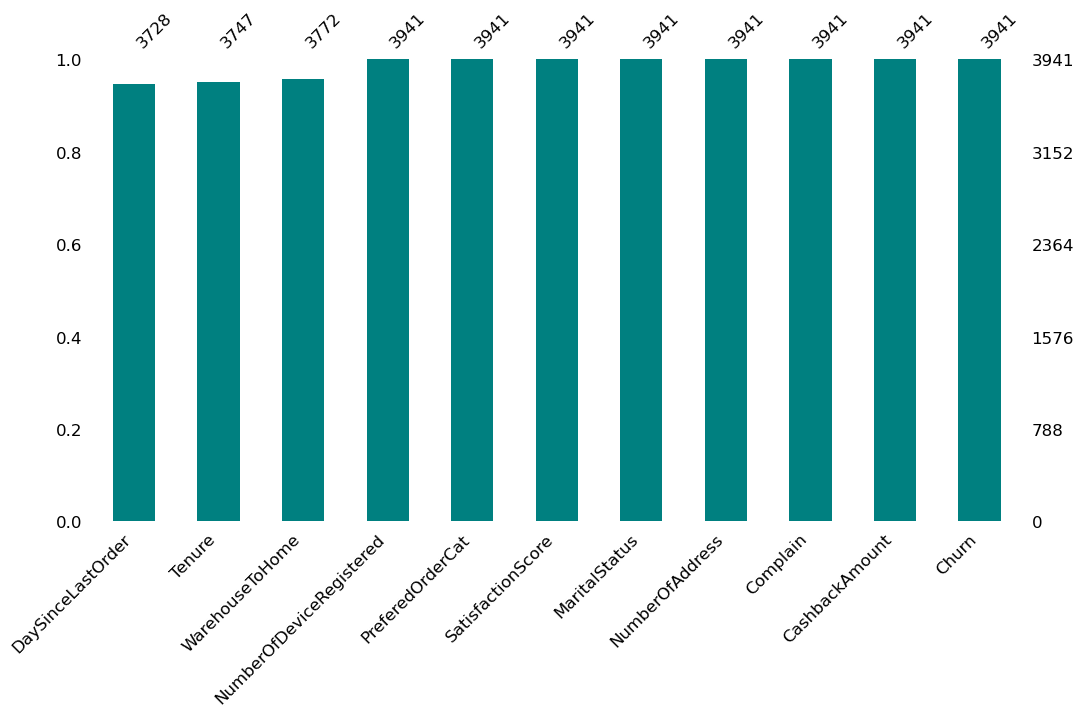

In [7]:
msno.bar(df, sort="ascending", figsize=(12,6), fontsize=12, color='teal');

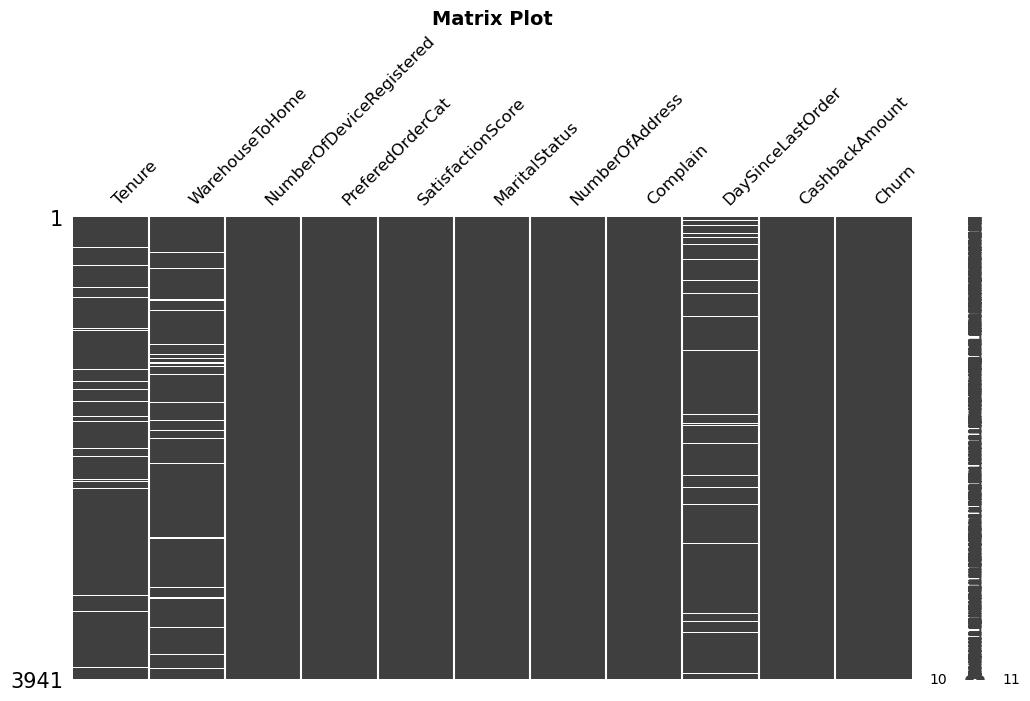

In [8]:
msno.matrix(df, figsize=(12,6), fontsize=12).set_title('Matrix Plot', size=14, weight='bold');

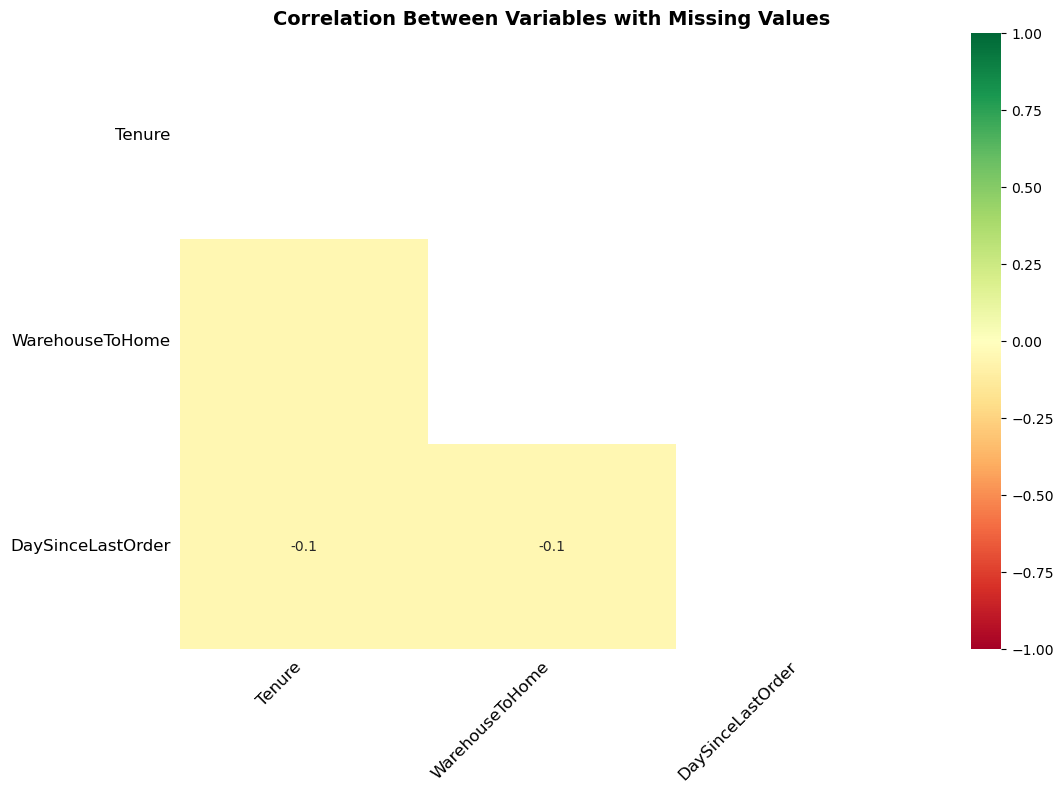

In [9]:
msno.heatmap(df, cmap="RdYlGn", figsize=(12,8), fontsize=12).set_title('Correlation Between Variables with Missing Values', size=14, weight='bold');

Pada heatmap diatas menunjukkan bahwa semua variabel yang memiliki missing values memiliki hubungan korelasi negatif yang sangat lemah (-0.1) atau tidak ada hubungan antara missing value dalam satu kolom dibandingkan dengan yang lain. Artinya apabila terdapat missing value pada satu variabel, maka tidak ditemukannya missing value pada variabel lainnya.

Sehingga dari beberapa visualisasi dari library missingno diatas, dapat disimpulkan bahwa missing value dalam dataset ini tidak saling berhubungan. Untuk proses pengisian missing value akan dijelaskan lebih lengkap pada tahap data preprocessing.

In [10]:
# Cek data duplikat pada dataset
print(f'Jumlah data duplikat: {df.duplicated().sum()}')

Jumlah data duplikat: 671


#### Distribution Data

,class,n_churned
0,0,3267
1,1,674


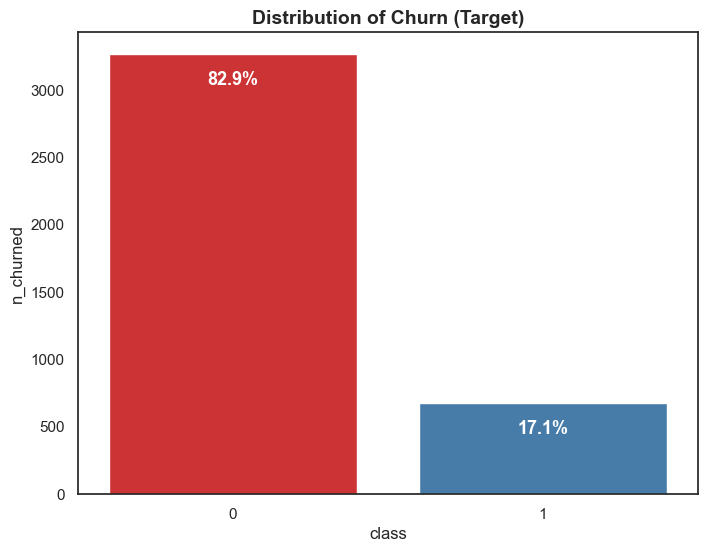

In [11]:
# Set theme dan palette untuk visualisasi
sns.set_theme(style='white', palette='Set1')

plt.figure(figsize=(8,6))
total = len(df)
ax = sns.countplot(data=df, x='Churn')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x()+0.4, p.get_height()-125), ha='center', va='top', color='white', size=13, weight='bold')
plt.title('Distribution of Churn (Target)', size=14, weight='bold')
ax.set_xlabel('class')
ax.set_ylabel('n_churned')

n_churned = pd.DataFrame(df['Churn'].value_counts()).reset_index().rename(columns={'index':'class', 'Churn':'n_churned'})
n_churned

In [12]:
numerical_columns = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
            'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
            'Churn']

,column,skewness,pvalue score
0,Tenure,0.789571,9.014014e-70
1,WarehouseToHome,1.428746,1.067451e-282
2,NumberOfDeviceRegistered,-0.409874,1.067451e-282
3,SatisfactionScore,-0.163771,1.067451e-282
4,NumberOfAddress,1.086842,1.067451e-282
5,Complain,0.967035,1.067451e-282
6,DaySinceLastOrder,1.337376,9.481224e-245
7,CashbackAmount,1.143194,9.481224e-245
8,Churn,1.748088,9.481224e-245


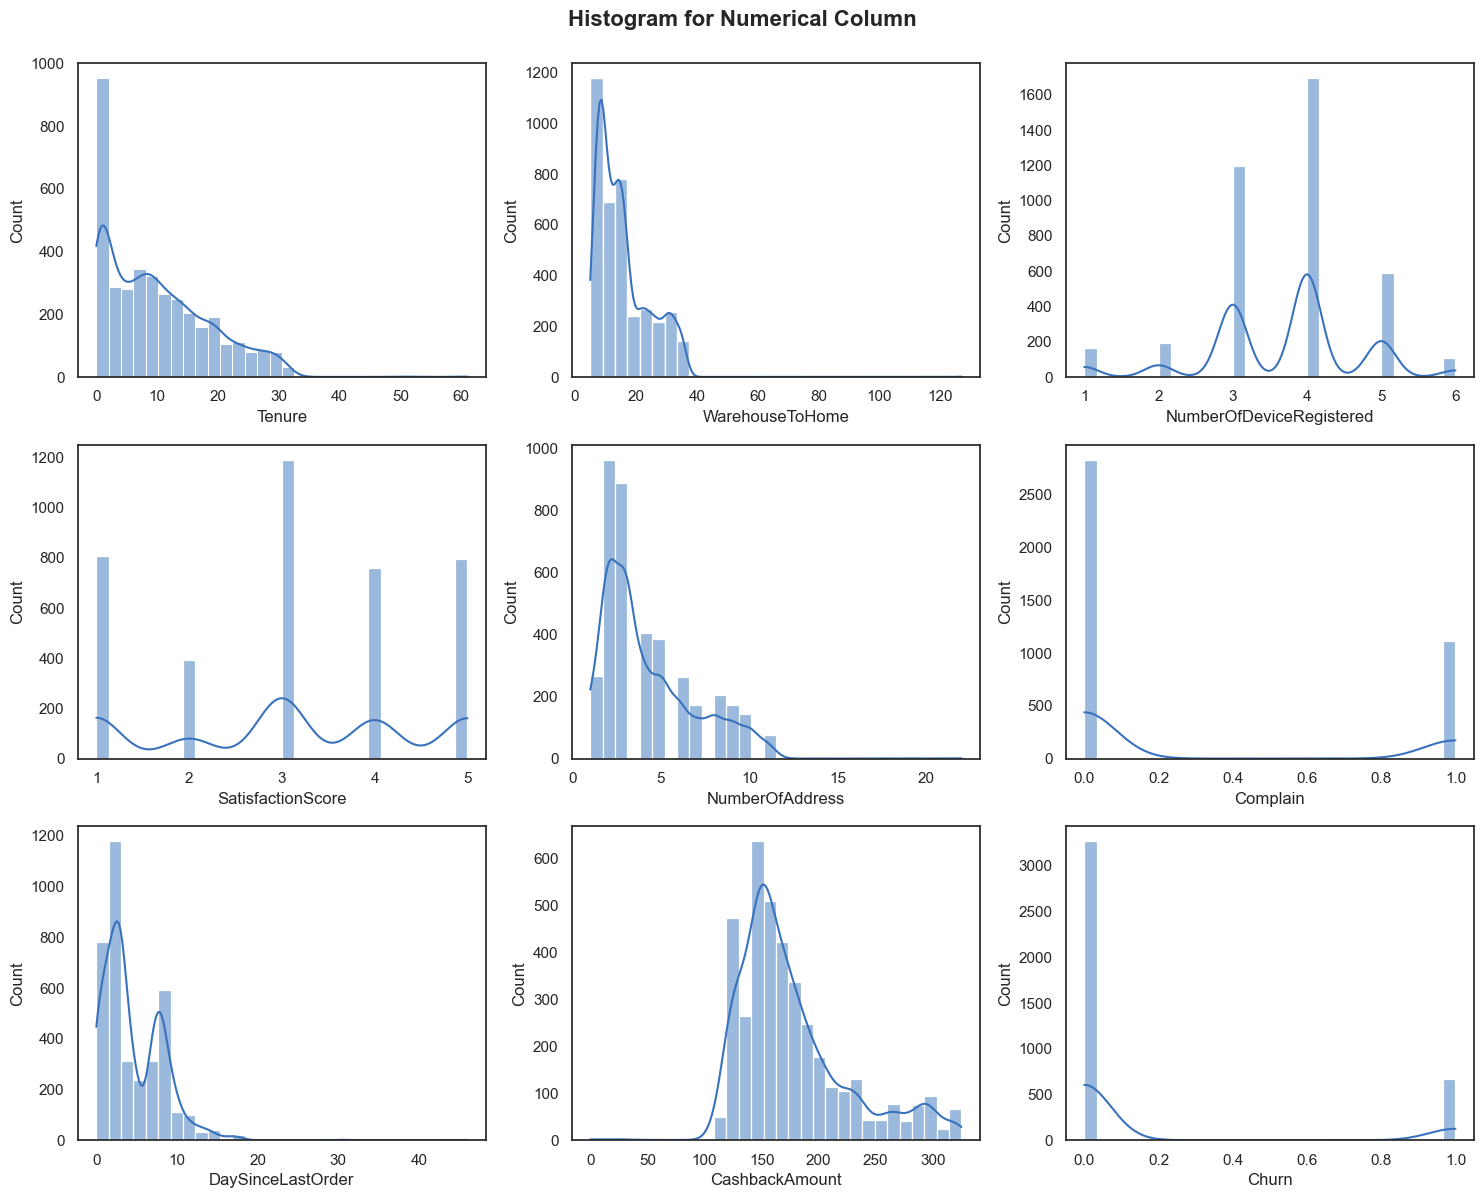

<Figure size 1500x1500 with 0 Axes>

In [13]:
plt.figure(figsize=(15, 15))
n = 4
for i in range(0, len(numerical_columns)):
    plt.subplot(n, math.ceil(len(numerical_columns)/n), i+1)
    sns.histplot(df[numerical_columns[i]], color='#3972bc', bins=30, kde=True)
    plt.tight_layout()

plt.suptitle('Histogram for Numerical Column', fontsize=16, y=1.02, fontweight='bold')
plt.show

plt.figure(figsize=(15, 15))

list_pvalue_cont = []
skew_cont = []

for cont in numerical_columns:
    if df[cont].isna().any() == True:
        s, pval = normaltest(df[cont].dropna())
        list_pvalue_cont.append(pval)
    else:
        s, pvalue = normaltest(df[cont].dropna())
        list_pvalue_cont.append(pval)
    skew_cont.append(df[cont].skew())

pvalue_cont = pd.DataFrame({'column': numerical_columns, 'skewness': skew_cont, 'pvalue score': list_pvalue_cont})
pvalue_cont

In [14]:
categorical_viz = ['PreferedOrderCat','MaritalStatus']

In [15]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

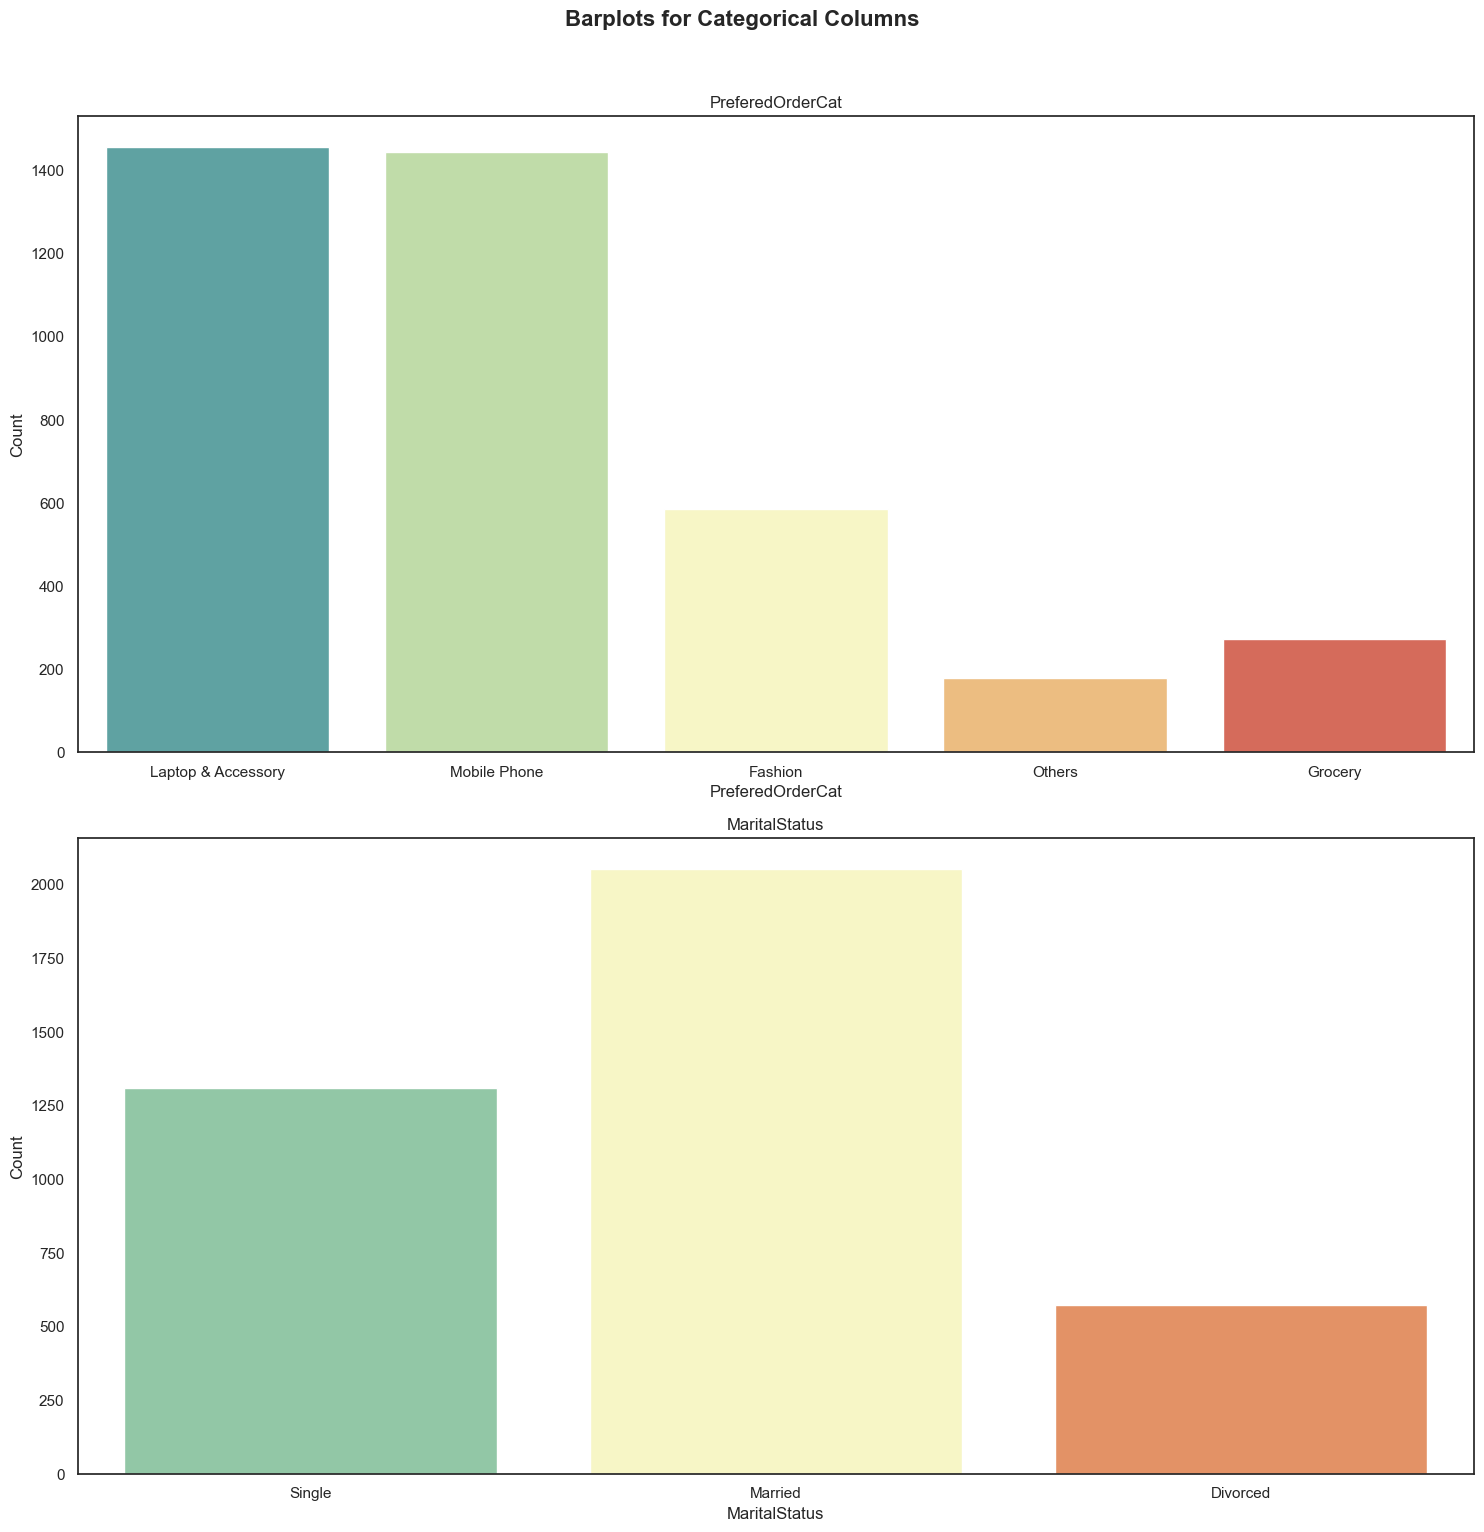

In [16]:
cat_cols = categorical_viz.copy()


plt.figure(figsize=(15, 15))
n = 2
for i, column in enumerate(cat_cols):
    plt.subplot(n, math.ceil(len(cat_cols)/n), i+1)
    bar_plot=sns.countplot(x=column, data=df, palette='Spectral_r')
    plt.title(column)
    plt.ylabel('Count')

plt.suptitle('Barplots for Categorical Columns', fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

#### Data Correlation

#### Numerical Feature vs Target
Untuk dapat memahami korelasi antara feature numerical dengan target, maka dilakukanlah uji korelasi antar feature. Karena semua feature numerical tidak terdistribusi normal, maka uji korelasi akan menggunakan uji korelasi 'spearman'. Rentang hasil uji korelasi adalah dari -1 sampai dengan 1.

Kekuatan korelasi:
- 0 - 0.2: sangat lemah
- 0.2 - 0.4: lemah
- 0.4 - 0.6: moderate
- 0.6 - 0.8: kuat
- 0.8 - 1.0: sangat kuat

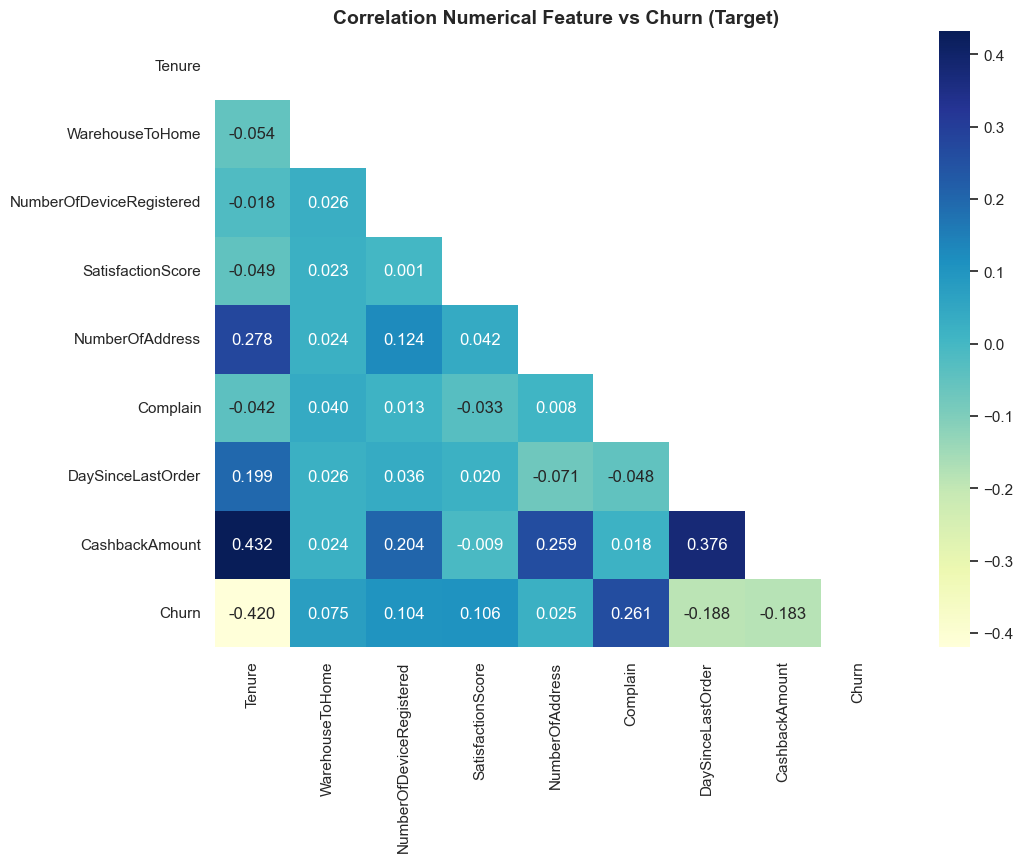

In [17]:
corr = df.corr('spearman')
plt.figure(figsize=(11,8))
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.3f', mask=matrix, cmap='YlGnBu')
plt.title('Correlation Numerical Feature vs Churn (Target)', size=14, weight='bold');

Feature `Tenure` memiliki hubungan korelasi negatif terkuat dengan score **-0.420** dan kekuatan hubungannya moderate. Artinya diasumsikan semakin rendah tenure dari customer, maka semakin tinggi angka customer yang churn.

#### Categorical Feature vs Target

Untuk melihat menguji keterkaitan antara feature categorical dengan target, disini akan menggunakan uji chi-square. Adapun hipotesisnya sebagai berikut:
- Ho: feature categorical dan target `Churn` tidak saling terkait (independent)
- Ha: feature categorical dan target `Churn` saling terkait (dependent)

In [18]:
cat_cols = list(df.describe(include='O').columns)
chi2_result = []

for i in cat_cols:
  df_chi = pd.crosstab(df[i], df['Churn'])
  stat, pvalue, dof, expected = chi2_contingency(df_chi)
  chi2_result.append(round(pvalue, 5))

df_chi_result = pd.DataFrame({'categorical_features': cat_cols,'chi2_score': chi2_result})
df_chi_result['notes'] = np.where(df_chi_result['chi2_score'] > 0.05, 'independent', 'dependent')
df_chi_result

,categorical_features,chi2_score,notes
0,PreferedOrderCat,0.0,dependent
1,MaritalStatus,0.0,dependent


Berdasarkan hasil uji chi-square diatas, diketahui bahwa semua feature categorical memiliki chi-square score < 0.05 (berhasil menolak Ho). Artinya masing-masing feature categorical saling terkait dengan target `Churn`.

### Data Analysis

Setelah dibuatkannya visualisasi atas distribusi data dan korelasi data antar variabel, selanjutnya akan dilakukan data analisis. Sebelum dilakukan analisis, saya memiliki asumsi-asumsi terkait analisis customer churn, sebagai berikut:
- Apakah customer yang berhenti menggunakan langganan ecommerce berhenti di awal bulan penggunaan layanan? tenure
- Apakah customer yang mengajukan complain cenderung berhenti menggunakan layanan ecommerce? complain
- Apakah angka kepuasan yang rendah akan menunjukkan tingkat churn yang tinggi? satisfaction
- Apakah customer yang keluar dari layanan ecommerce tidak lagi melakukan order pembelanjaan seminggu terakhir? daysince
- Bagaimana pembelian produk dari customer yang churn? Apakah berpengaruh dari cashback yang didapatkan? prefered order dan cashback
- Apakah customer yang sudah menikah yang lebih banyak berhenti dari layanan ecommerce? maritalstatus

1. Apakah customer yang berhenti menggunakan langganan ecommerce berhenti di awal bulan penggunaan layanan? tenure

Churn,0,1,Total,Churn %
Tenure,,,,
0.0,152.0,195.0,347.0,56.2
1.0,237.0,252.0,489.0,51.5
2.0,107.0,10.0,117.0,8.5
3.0,123.0,13.0,136.0,9.6
4.0,138.0,13.0,151.0,8.6


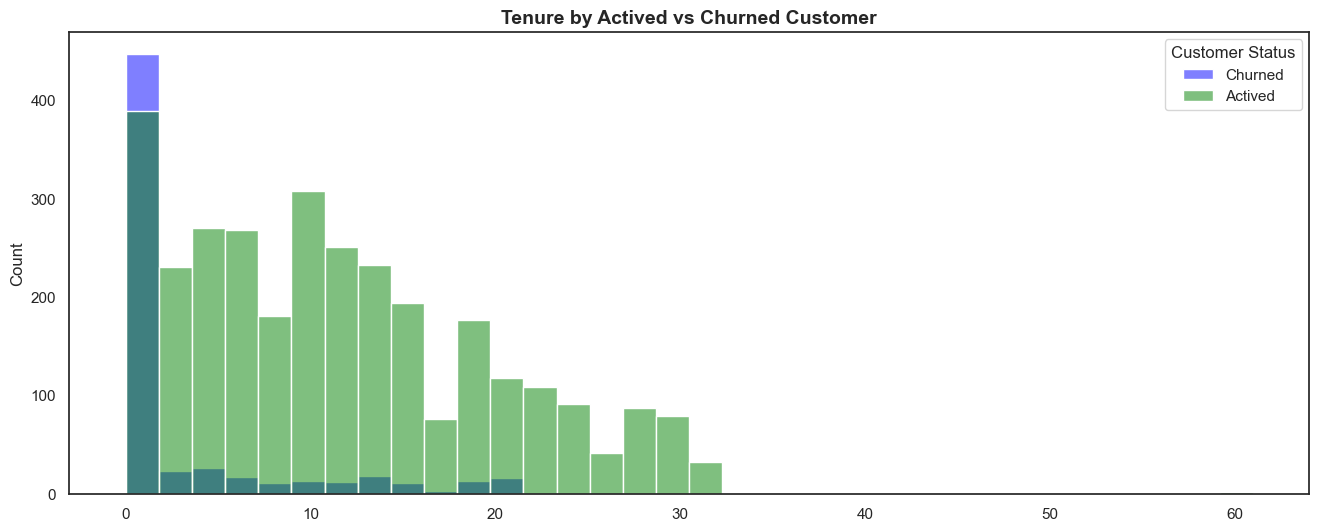

In [19]:
# Function untuk crosstab table
def crosstab_viz(col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.loc['Total'] = crosstab.sum()
    crosstab.loc[f'{col1} %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
    return crosstab

plt.figure(figsize=(16,6))
ax = sns.histplot(data=df, x='Tenure', hue='Churn', palette=['green', 'blue'])
ax.set_title('Tenure by Actived vs Churned Customer', size=14, weight='bold')
ax.set_xlabel(None)
plt.legend(title='Customer Status', labels=['Churned', 'Actived'])

crosstab_viz('Churn', 'Tenure').T.head()

Karena `Tenure` berkorelasi negatif terkuat dengan `Churn`, maka dengan visualisasi histogram diatas kita mengetahui bahwa angka penggunaan layanan ecommerce meningkat di bawah 2 bulan. Hal ini dapat diasumsikan karena customer tertarik di awal dengan layanan yang disuguhkan ecommerce tersebut. Namun jika kita lihat berdasarkan `Churn`, ternyata asumsi di awal benar dimana angka customer yang berhenti menggunakan layanan ecommerce di bawah 2 bulan lebih tinggi daripada periode lainnya. Jika dilihat dari table,  persentase customer yang berhenti menggunakan layanan ecommerce lebih dari 50% dari total user di bawah 2 bulan tersebut. Customer churn di awal periode seperti itu dapat disebut sebagai early-life churn. Berdasarkan [domain knowledge](https://www.cartesian.com/monitoring-and-mitigating-early-life-churn/), pada periode awal penggunaan suatu layanan, customer kerap berhenti dari layanan tersebut karena berbagai hal, seperti:
- Support customer yang tidak memuaskan (kadang hingga tidak menyelesaikan permasalahan),
- Ketersediaan produk dalam ecommerce,
- Kualitas layanan ecommerce (misal proses pembayaran, proses pengiriman), dan lainnya.

Namun untuk meningkatkan `Tenure` customer menggunakan aplikasi e-commerce ini, perusahaan dapat mempertimbangkan implementasi *gamefication* dalam ecommerce (misal. sistem poin, sistem leveling, etc.)

2. Apakah customer yang mengajukan complain cenderung berhenti menggunakan layanan ecommerce? complain

Complain,0,1
Churn,,
0,2519.0,748.0
1,309.0,365.0
Total,2828.0,1113.0
Churn %,10.9,32.8


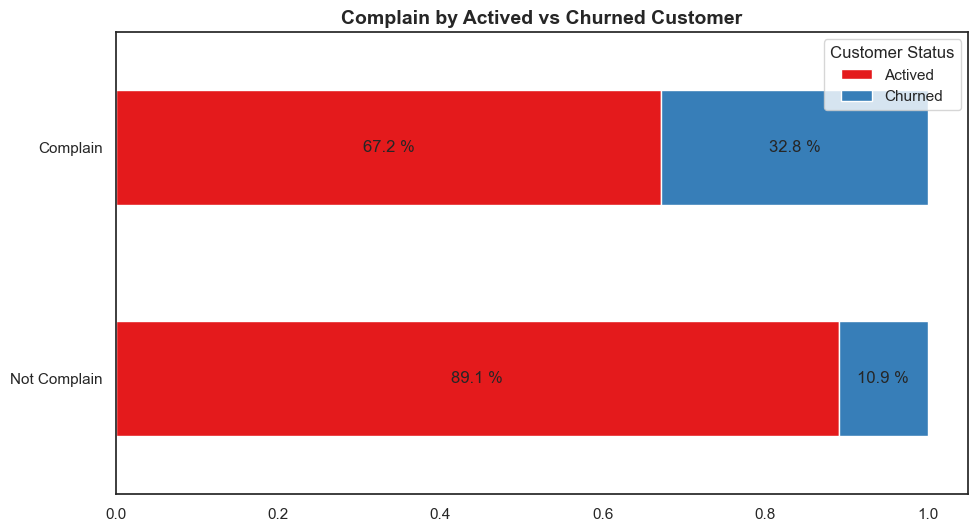

In [20]:
plt.figure(figsize=(11,6))
ax = plt.subplot(111)
complain_churn = df.groupby('Complain')['Churn'].value_counts(normalize=True).unstack('Churn')
complain_churn.plot.barh(stacked=True, ax = ax)
plt.title('Complain by Actived vs Churned Customer', size=14, weight='bold')
plt.yticks(ticks=[0, 1], labels=['Not Complain', 'Complain'], rotation=0)
plt.ylabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')

for ix, row in complain_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix, 
                    f"{int(round(element,3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'Complain')

In [21]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


3. Apakah angka kepuasan yang rendah akan menunjukkan tingkat churn yang tinggi? satisfaction

SatisfactionScore,1,2,3,4,5
Churn,,,,,
0,712.0,341.0,979.0,637.0,598.0
1,93.0,51.0,211.0,121.0,198.0
Total,805.0,392.0,1190.0,758.0,796.0
Churn %,11.6,13.0,17.7,16.0,24.9


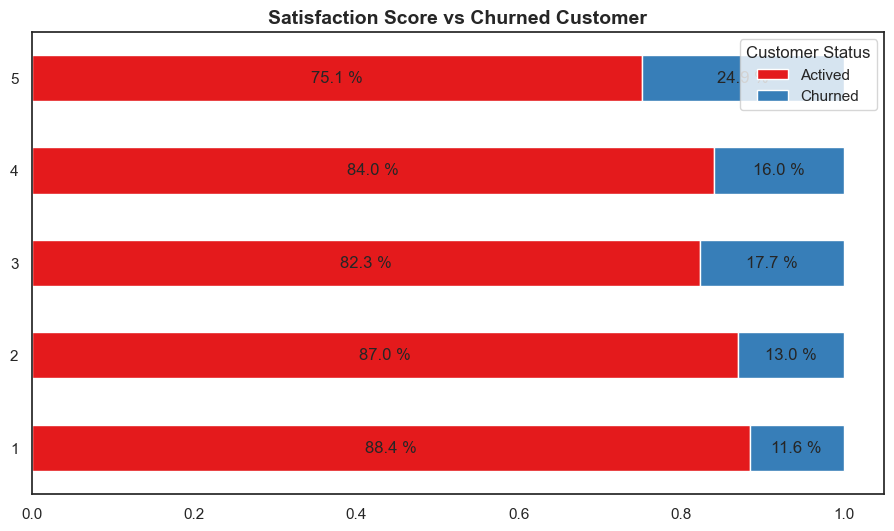

In [22]:
plt.figure(figsize=(11,6))
ax = plt.subplot(111)
complain_churn = df.groupby('SatisfactionScore')['Churn'].value_counts(normalize=True).unstack('Churn')
complain_churn.plot.barh(stacked=True, ax = ax)
plt.title('Satisfaction Score vs Churned Customer', size=14, weight='bold')
plt.ylabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')

for ix, row in complain_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix, 
                    f"{int(round(element,3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'SatisfactionScore')

4. Apakah customer yang keluar dari layanan ecommerce tidak lagi melakukan order pembelanjaan seminggu terakhir? daysince

DaySinceLastOrder,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,30.0,31.0,46.0
Churn,,,,,,,,,,,,,,,,,,,,,,
0,222.0,310.0,461.0,541.0,272.0,132.0,69.0,269.0,334.0,187.0,104.0,54.0,41.0,33.0,24.0,12.0,8.0,12.0,7.0,1.0,1.0,0.0
1,123.0,128.0,85.0,91.0,40.0,23.0,12.0,45.0,48.0,21.0,7.0,4.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Total,345.0,438.0,546.0,632.0,312.0,155.0,81.0,314.0,382.0,208.0,111.0,58.0,42.0,33.0,28.0,13.0,8.0,12.0,7.0,1.0,1.0,1.0
Churn %,35.7,29.2,15.6,14.4,12.8,14.8,14.8,14.3,12.6,10.1,6.3,6.9,2.4,0.0,14.3,7.7,0.0,0.0,0.0,0.0,0.0,100.0


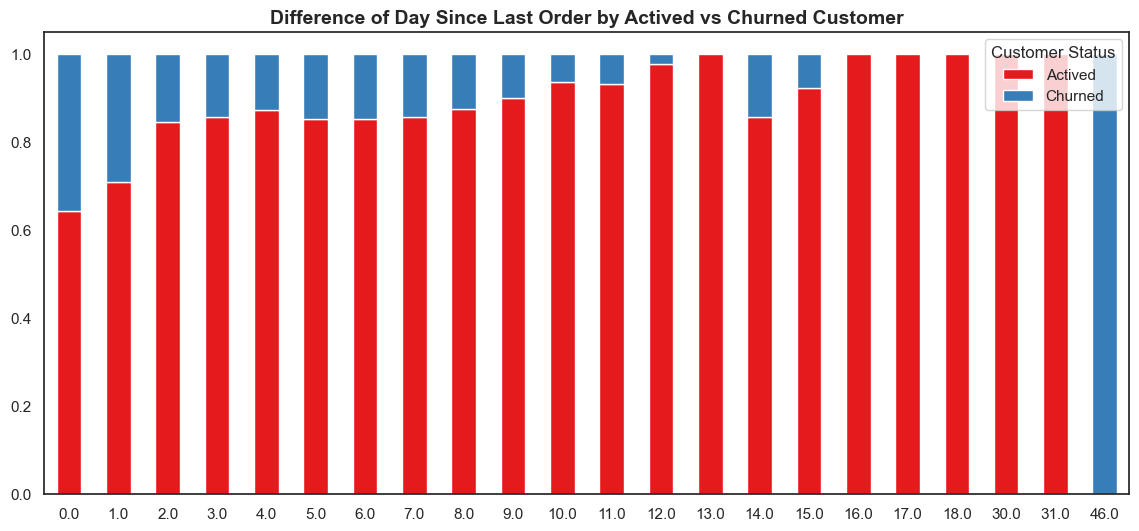

In [23]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
order_churn = df.groupby('DaySinceLastOrder')['Churn'].value_counts(normalize=True).unstack('Churn')
order_churn.plot.bar(stacked=True, ax = ax)
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')
plt.title('Difference of Day Since Last Order by Actived vs Churned Customer', size=14, weight='bold');

pd.set_option('display.max_columns', None)
crosstab_viz('Churn', 'DaySinceLastOrder')

5. Bagaimana pembelian produk dari customer yang churn? Apakah berpengaruh dari cashback yang didapatkan? prefered order dan cashback

PreferedOrderCat,Fashion,Grocery,Laptop & Accessory,Mobile Phone,Others
Churn,,,,,
0,491.0,261.0,1316.0,1032.0,167.0
1,94.0,12.0,142.0,414.0,12.0
Total,585.0,273.0,1458.0,1446.0,179.0
Churn %,16.1,4.4,9.7,28.6,6.7


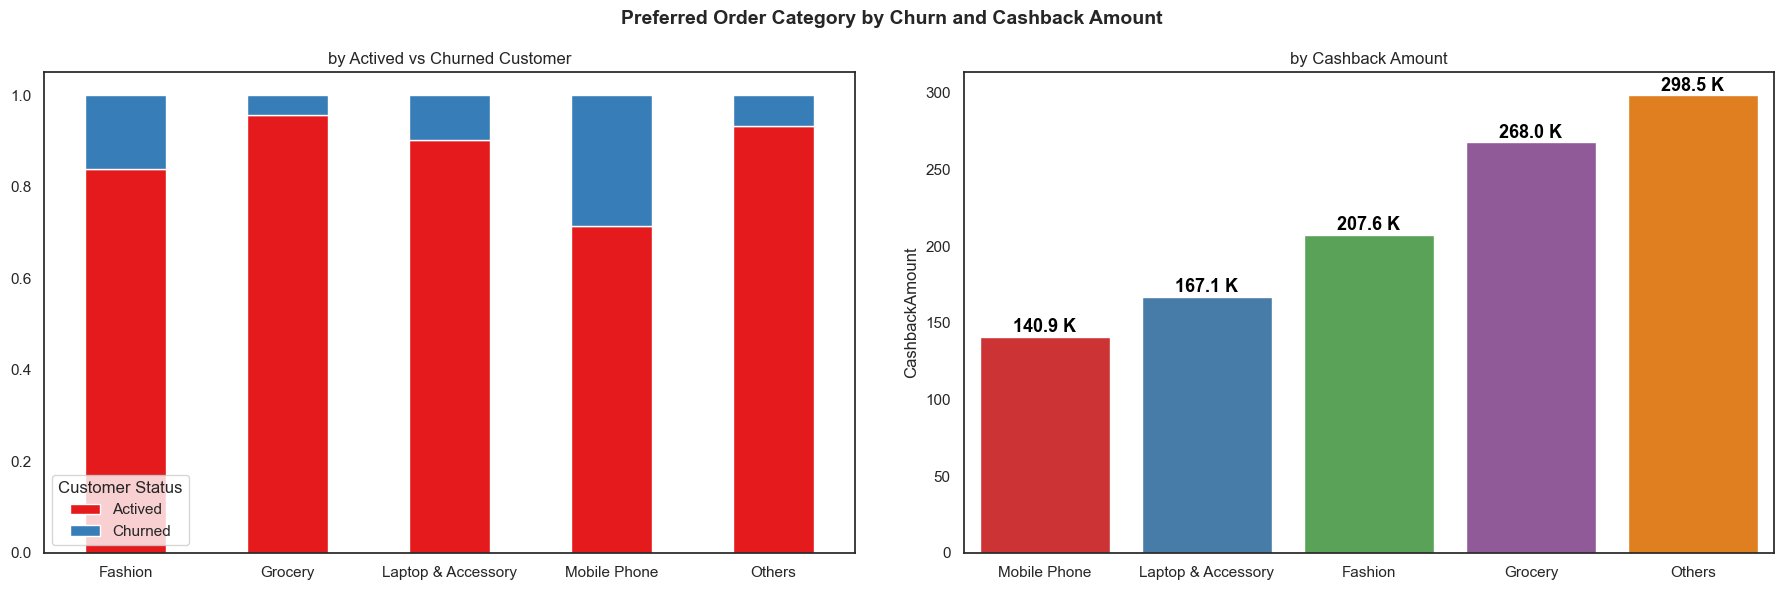

In [24]:
fig = plt.figure(figsize=(18,6))
fig.suptitle('Preferred Order Category by Churn and Cashback Amount', size=14, weight='bold')

ax = plt.subplot(1,2,1)
df.groupby('PreferedOrderCat')['Churn'].value_counts(normalize=True).unstack('Churn').plot.bar(stacked=True, ax=ax).set_title('by Actived vs Churned Customer')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='lower left')

ax = plt.subplot(1,2,2)
lb = sns.barplot(data=df, x='PreferedOrderCat', y='CashbackAmount', estimator=np.median, ci=0, ax=ax, order=df.groupby('PreferedOrderCat')['CashbackAmount'].median().sort_values().index)
for p in lb.patches:
    lb.annotate(f'{round(p.get_height(), 1)} K', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13, weight='bold')
plt.title('by Cashback Amount')
plt.xlabel(None)
plt.tight_layout(w_pad=3)

crosstab_viz('Churn', 'PreferedOrderCat')

6. Apakah customer yang sudah menikah yang lebih banyak berhenti dari layanan ecommerce? maritalstatus

MaritalStatus,Divorced,Married,Single
Churn,,,
0,487.0,1825.0,955.0
1,89.0,230.0,355.0
Total,576.0,2055.0,1310.0
Churn %,15.5,11.2,27.1


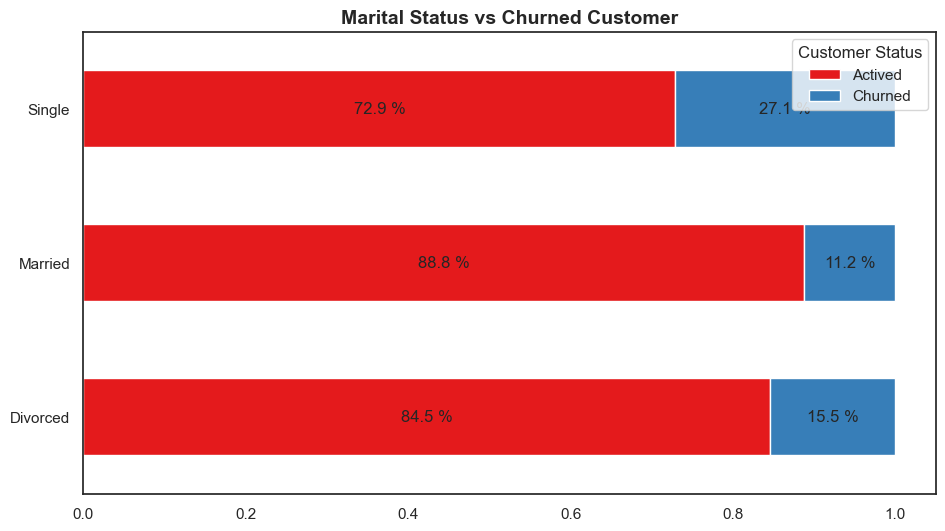

In [25]:
plt.figure(figsize=(11,6))
ax = plt.subplot(111)
complain_churn = df.groupby('MaritalStatus')['Churn'].value_counts(normalize=True).unstack('Churn')
complain_churn.plot.barh(stacked=True, ax = ax)
plt.title('Marital Status vs Churned Customer', size=14, weight='bold')
plt.ylabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')

for ix, row in complain_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix, 
                    f"{int(round(element,3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'MaritalStatus')

In [26]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


#### Data Cleaning

In [27]:
# Drop data duplicates
df = df.drop_duplicates()

# Menampilkan jumlah baris dan kolom setelah drop duplicates
print(f'Jumlah baris dataset: {df.shape[0]}\nJumlah kolom dataset: {df.shape[1]}')

Jumlah baris dataset: 3269
Jumlah kolom dataset: 11


In [28]:
# Membuat SimpleImputer dengan strategy 'median'
median_imputer = SimpleImputer(strategy='median')

# Mengisi missing value untuk kolom 'Tenure'
df['Tenure_filled'] = df.groupby('Churn')['Tenure'].transform(lambda x: median_imputer.fit_transform(x.values.reshape(-1, 1)).flatten())

# Mengisi missing value untuk kolom 'WarehouseToHome'
df['WarehouseToHome_filled'] = df.groupby('Churn')['WarehouseToHome'].transform(lambda x: median_imputer.fit_transform(x.values.reshape(-1, 1)).flatten())

# Mengisi missing value untuk kolom 'DaySinceLastOrder'
def fill_missing_values(x):
    if x.notnull().any():
        return median_imputer.fit_transform(x.values.reshape(-1, 1)).flatten()
    else:
        # Return a default value or handle missing values in another way
        return x

df['DaySinceLastOrder_filled'] = df.groupby('CashbackAmount')['DaySinceLastOrder'].transform(fill_missing_values)

# Transformasi kolom
transformer = ColumnTransformer([
    ('imp_simp_tenure', 'passthrough', ['Tenure_filled']), 
    ('imp_simp_wrh', 'passthrough', ['WarehouseToHome_filled']),
    ('imp_simp_days', 'passthrough', ['DaySinceLastOrder_filled']),
], remainder='passthrough')

In [29]:
df.drop(['Tenure','WarehouseToHome','DaySinceLastOrder'], axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NumberOfDeviceRegistered  3269 non-null   int64  
 1   PreferedOrderCat          3269 non-null   object 
 2   SatisfactionScore         3269 non-null   int64  
 3   MaritalStatus             3269 non-null   object 
 4   NumberOfAddress           3269 non-null   int64  
 5   Complain                  3269 non-null   int64  
 6   CashbackAmount            3269 non-null   float64
 7   Churn                     3269 non-null   int64  
 8   Tenure_filled             3269 non-null   float64
 9   WarehouseToHome_filled    3269 non-null   float64
 10  DaySinceLastOrder_filled  3089 non-null   float64
dtypes: float64(4), int64(5), object(2)
memory usage: 306.5+ KB


In [31]:
numerical_col = ['Tenure_filled', 'WarehouseToHome_filled', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
            'NumberOfAddress', 'Complain', 'DaySinceLastOrder_filled', 'CashbackAmount',
            'Churn']

<function matplotlib.pyplot.show(close=None, block=None)>

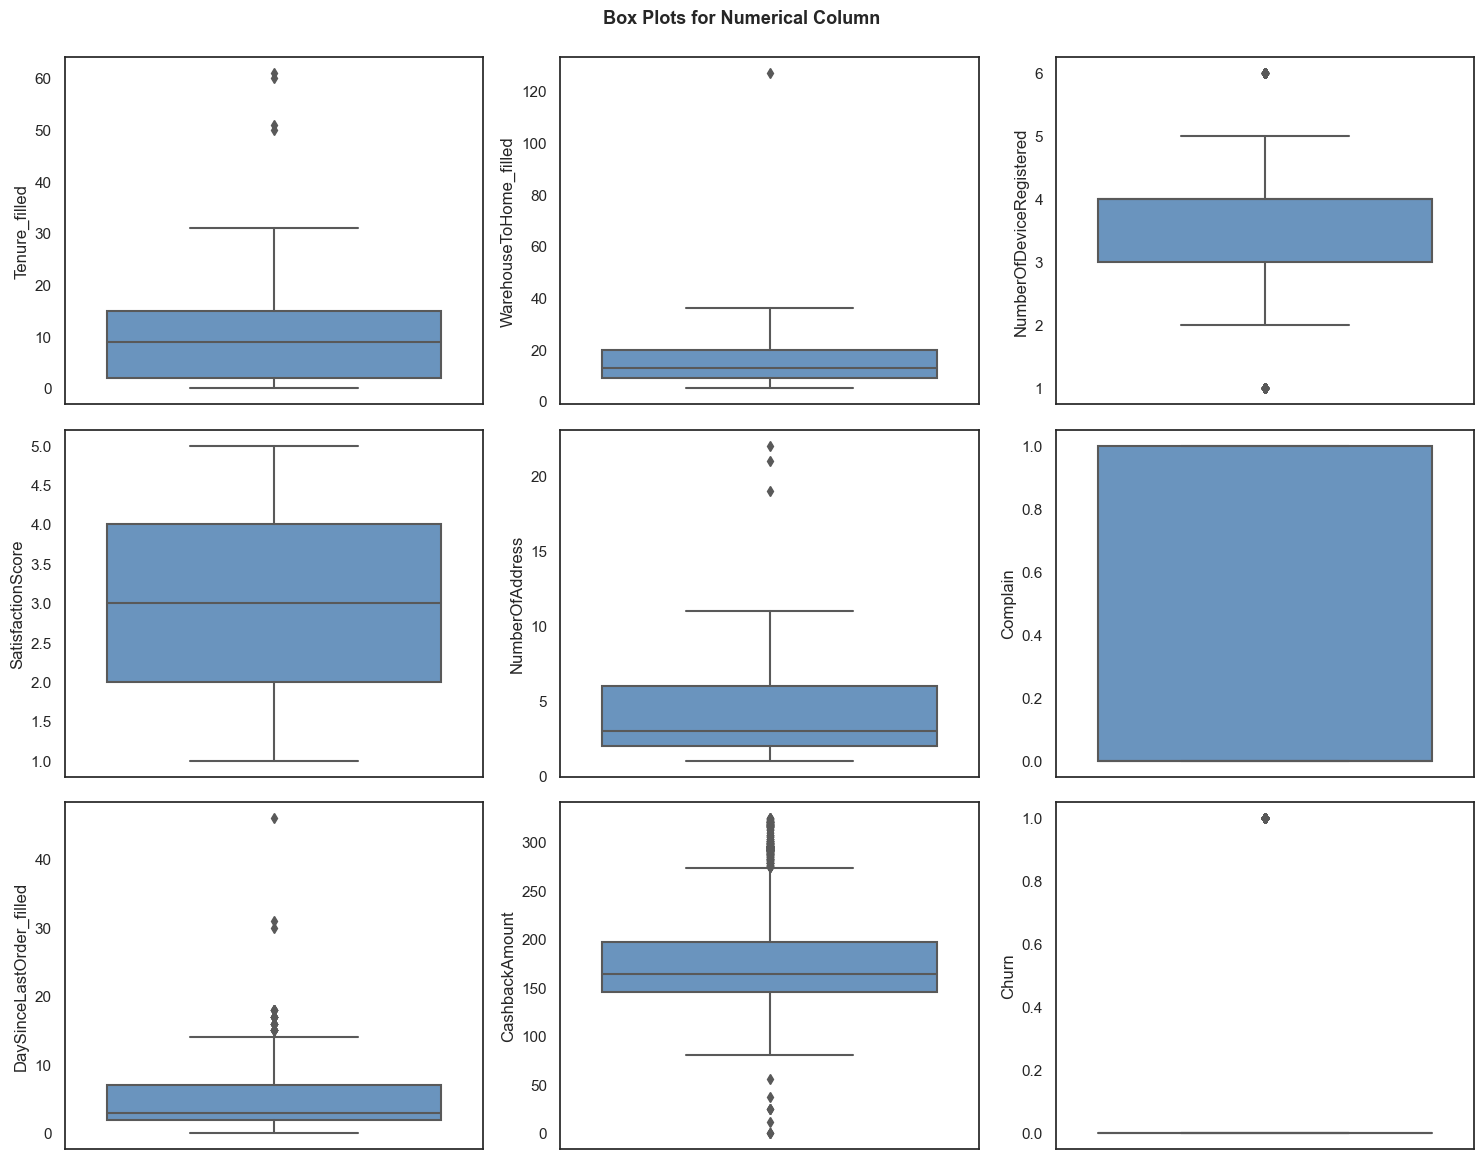

In [32]:
#Check Outliers
plt.figure(figsize=(15, 15))
n = 4
for i in range(0, len(numerical_col)):
    plt.subplot(n, math.ceil(len(numerical_col)/n), i+1)
    sns.boxplot(y=df[numerical_col[i]], color='#5c94cc', orient='v')
    plt.tight_layout()

plt.suptitle('Box Plots for Numerical Column', fontsize=13, y=1.02, fontweight='bold')
plt.show

In [33]:
lower_whisker = []
upper_whisker = []
is_outlier = []
n_outlier = []
non_outlier = []

for i in numerical_col:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (IQR * 1.5)
    upper = Q3 + (IQR * 1.5)

    outlier_filter = (df[i] >= lower) & (df[i] <= upper)
    lower_whisker.append(lower)
    upper_whisker.append(upper)
    is_outlier.append(df[i][~outlier_filter].any())
    n_outlier.append(len(df[~outlier_filter]))
    non_outlier.append(len(df[outlier_filter]))

pd.DataFrame({
    'Column Name' : numerical_col,
    'Is_outlier' : is_outlier,
    'Lower Whisker' : lower_whisker,
    'Upper Whisker' : upper_whisker, 
    'Outlier' : n_outlier,
    'Non Outlier' : non_outlier
})

,Column Name,Is_outlier,Lower Whisker,Upper Whisker,Outlier,Non Outlier
0,Tenure_filled,True,-17.50,34.5,4,3265
1,WarehouseToHome_filled,True,-7.50,36.5,1,3268
2,NumberOfDeviceRegistered,True,1.50,5.5,226,3043
3,SatisfactionScore,False,-1.00,7.0,0,3269
4,NumberOfAddress,True,-4.00,12.0,3,3266
5,Complain,False,-1.50,2.5,0,3269
6,DaySinceLastOrder_filled,True,-5.50,14.5,220,3049
7,CashbackAmount,True,69.04,274.0,253,3016
8,Churn,True,0.00,0.0,533,2736


In [34]:
df = df[(df['Tenure_filled']<34.5) & (df['WarehouseToHome_filled']<36.5) & (df['NumberOfDeviceRegistered']<5.5) & (df['NumberOfDeviceRegistered']>1.5)
   & (df['NumberOfAddress']<12) & (df['DaySinceLastOrder_filled']<14.5) & (df['CashbackAmount']<274)
   & (df['CashbackAmount']>69.04)]

In [35]:
df['Churn'].value_counts()

0    2157
1     449
Name: Churn, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

# Split dataset
df_seen, df_unseen = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE)

In [65]:
# Integrasikan data preparation + feature engineering sebagai pipeline data preprocessor
pipeline = [
    ("onehot", TransformerWrapper(include=['PreferedOrderCat', 'MaritalStatus'], transformer=OneHotEncoder())),
]

In [66]:
from pycaret.classification import *

# Setup awal experimen
setup(
    # general setup
    data=df_seen, 
    target='Churn',
    train_size=0.8,
    verbose=False,
    session_id=RANDOM_STATE, 

    # data pre-processing
    preprocess=None,
    imputation_type=None,
    custom_pipeline=pipeline,
    custom_pipeline_position=0,
)

# Tampilkan pipeline
get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/bv/1m6kfd1x5h1919q52y6mzss40000gn/T/joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['PreferedOrderCat',
                                                                            'MaritalStatus'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop=None,
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             feature_name_combiner='concat',
                                                                                             handle_unknown='error',
                                                                                             max_categories=None,
                                                                                             min_frequency=None,
                                                                                             sparse_output=True))))],
         verbose=False)

In [90]:
from sklearn.metrics import precision_score, recall_score

# Define F2 Score function
def f2_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    beta = 2
    f2 = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
    return f2

# Setup Pycaret
clf = setup(data=df, target='Churn')

# Train the model
xgboost = create_model('xgboost')

# Predict on the test set
predictions = predict_model(xgboost)

# Calculate F2 Score
f2 = f2_score(predictions['Churn'], predictions['F1'])
print("F2 Score:", f2)

,Description,Value
0,Session id,1320
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(2606, 11)"
4,Transformed data shape,"(2606, 16)"
5,Transformed train set shape,"(1824, 16)"
6,Transformed test set shape,"(782, 16)"
7,Numeric features,8
8,Categorical features,2
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9290,0.9532,0.7812,0.8065,0.7937,0.7508,0.7509
1,0.9180,0.9311,0.7500,0.7742,0.7619,0.7124,0.7125
2,0.9180,0.9267,0.8438,0.7297,0.7826,0.7324,0.7354
3,0.9290,0.9654,0.7500,0.8276,0.7869,0.7444,0.7457
4,0.9231,0.9227,0.6774,0.8400,0.7500,0.7052,0.7109
5,0.9121,0.9562,0.8387,0.7027,0.7647,0.7112,0.7154
6,0.9505,0.9761,0.7742,0.9231,0.8421,0.8131,0.8175
7,0.9066,0.9000,0.5806,0.8182,0.6792,0.6264,0.6390
8,0.9011,0.9291,0.6129,0.7600,0.6786,0.6209,0.6259


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9258,0.9366,0.6963,0.8468,0.7642,0.7207,0.7256


KeyError: 'F1'

In [67]:
compare_models(sort='recall')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:55:27
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7271,0.8332,0.7995,0.3805,0.5113,0.3601,0.4087,0.0350
xgboost,Extreme Gradient Boosting,0.9244,0.9519,0.7298,0.8167,0.7662,0.7217,0.7262,0.1280
lightgbm,Light Gradient Boosting Machine,0.9244,0.9497,0.7193,0.8255,0.7644,0.7200,0.7251,0.5520
dt,Decision Tree Classifier,0.8944,0.8197,0.7054,0.7002,0.6978,0.6343,0.6376,0.0390
gbc,Gradient Boosting Classifier,0.9082,0.9371,0.6399,0.7937,0.7043,0.6511,0.6589,0.2690
rf,Random Forest Classifier,0.9190,0.9415,0.6362,0.8662,0.7290,0.6831,0.6969,0.2720
ada,Ada Boost Classifier,0.8921,0.9177,0.6191,0.7175,0.6630,0.5994,0.6027,0.1350
svm,SVM - Linear Kernel,0.8003,0.8637,0.5542,0.4694,0.4230,0.3431,0.3799,0.0360
et,Extra Trees Classifier,0.9034,0.9244,0.5462,0.8447,0.6590,0.6063,0.6281,0.2390
lr,Logistic Regression,0.8854,0.8934,0.5360,0.7390,0.6171,0.5521,0.5643,1.1050


GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
nb = create_model('nb')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:56:13
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7605,0.8533,0.8276,0.4068,0.5455,0.4075,0.4549
1,0.7665,0.8721,0.7931,0.4107,0.5412,0.4050,0.4445
2,0.4790,0.8080,0.9655,0.2456,0.3916,0.1587,0.2786
3,0.7485,0.8133,0.7241,0.3818,0.5000,0.3528,0.3851
4,0.7545,0.8108,0.7241,0.3889,0.5060,0.3618,0.3928
5,0.7784,0.7949,0.7586,0.4231,0.5432,0.4121,0.4428
6,0.7545,0.8636,0.8621,0.4032,0.5495,0.4098,0.4657
7,0.7892,0.8711,0.8571,0.4364,0.5783,0.4569,0.5032
8,0.7108,0.7752,0.6552,0.3333,0.4419,0.2737,0.3021


In [69]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9281,0.9483,0.8276,0.7742,0.8000,0.7563,0.7569
1,0.9162,0.9713,0.6207,0.8571,0.7200,0.6722,0.6843
2,0.9461,0.9740,0.8621,0.8333,0.8475,0.8147,0.8149
3,0.9102,0.9350,0.5862,0.8500,0.6939,0.6433,0.6586
4,0.8922,0.9105,0.6207,0.7200,0.6667,0.6028,0.6052
5,0.9521,0.9693,0.8621,0.8621,0.8621,0.8331,0.8331
6,0.9341,0.9590,0.7931,0.8214,0.8070,0.7673,0.7675
7,0.9217,0.9376,0.6429,0.8571,0.7347,0.6899,0.6997
8,0.9096,0.9466,0.6552,0.7917,0.7170,0.6638,0.6680


In [72]:
best_model = compare_models(include=[nb, xgboost])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:56:32
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
1,Extreme Gradient Boosting,0.9244,0.9519,0.7298,0.8167,0.7662,0.7217,0.7262,0.0720
0,Naive Bayes,0.7271,0.8332,0.7995,0.3805,0.5113,0.3601,0.4087,0.0450


In [73]:
final_model = finalize_model(best_model)

In [74]:
predict_model(final_model, data=df_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9253,0.9516,0.6932,0.8356,0.7578,0.7140,0.7184


,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CashbackAmount,Tenure_filled,WarehouseToHome_filled,DaySinceLastOrder_filled,Churn,prediction_label,prediction_score
1021,3,Mobile Phone,3,Married,4,0,129.360001,15.0,16.0,3.0,0,0,0.9994
1025,4,Mobile Phone,2,Married,2,1,151.949997,5.0,9.0,3.0,0,0,0.9989
781,3,Fashion,3,Married,4,0,170.940002,9.0,16.0,7.0,0,0,0.9622
542,2,Mobile Phone,2,Single,3,0,151.779999,1.0,28.0,3.0,0,0,0.9987
3417,4,Mobile Phone,4,Divorced,6,0,132.940002,7.0,6.0,2.0,0,0,0.9985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,4,Mobile Phone,3,Divorced,2,0,112.809998,10.0,9.0,0.0,0,0,0.9992
3079,4,Laptop & Accessory,1,Married,1,0,146.270004,3.0,12.0,7.0,0,0,0.9999
62,3,Mobile Phone,3,Married,2,0,129.110001,4.0,32.0,3.0,0,0,0.9999
3767,4,Laptop & Accessory,2,Married,3,0,174.679993,9.0,18.0,3.0,0,0,0.9976


In [76]:
from collections import Counter
# Check the class distribution
print("Class distribution :", Counter(df['Churn']))


Class distribution : Counter({0: 2157, 1: 449})


In [77]:
K_FOLDS = 5

# Define configuration parameters
configs = {
    'data': df_seen, 
    'target': 'Churn', 
    'train_size': 0.8,
    'verbose': False,
    'preprocess': None,
    'session_id': RANDOM_STATE, 
    'custom_pipeline_position': 0,
    'fold': K_FOLDS,
    'fold_shuffle': False,
} 

In [78]:
# Initiliaze experiment setup for the first experiment
penalize = ClassificationExperiment()
penalize.setup(
    experiment_name='No Resampling', 
    custom_pipeline=pipeline, 
    **configs)

In [79]:
from imblearn.over_sampling import SMOTE
from pycaret.internal.preprocess.transformers import FixImbalancer

# Initialize experiment setup for the second experiment
smote = ClassificationExperiment()
smote.setup(
    experiment_name='SMOTE Resampling', 
    custom_pipeline=pipeline+[('resampling', TransformerWrapper(transformer=FixImbalancer(SMOTE())))], 
    **configs)

In [80]:
from imblearn.under_sampling import NearMiss

# Initialize experiment setup for the third experiment
nearmiss = ClassificationExperiment()
nearmiss.setup(
    experiment_name='NearMiss Resampling', 
    custom_pipeline=pipeline+[('resampling', TransformerWrapper(transformer=FixImbalancer(NearMiss(version=3))))], 
    **configs)

In [81]:
param_grid = {
    "max_depth": [4, 5, 6, 7, 8, 9, 10, 20],
    "criterion": ["gini", "entropy"],
}

In [82]:
# Create XGBoost
penalize_xg = penalize.create_model('xgboost', class_weight={0: 1, 1: 5}, verbose=False)

# Perform GridSearchCV for hyperparameter tunning
penalize_tuned_xg = penalize.tune_model(
    estimator=penalize_xg, 
    optimize='f1', 
    custom_grid=param_grid, 
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9162,0.9527,0.7241,0.7778,0.7500,0.6997,0.7004
1,0.9341,0.9525,0.7759,0.8333,0.8036,0.7641,0.7648
2,0.9069,0.9109,0.7018,0.7407,0.7207,0.6649,0.6653
3,0.9399,0.9498,0.7586,0.8800,0.8148,0.7792,0.7823
4,0.9309,0.9462,0.7586,0.8302,0.7928,0.7515,0.7526
Mean,0.9256,0.9424,0.7438,0.8124,0.7764,0.7319,0.7330
Std,0.0122,0.0159,0.0269,0.0483,0.0354,0.0428,0.0435


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [52]:
# Create XGBoost
penalize_xg = penalize.create_model('xgboost', class_weight='balanced', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
penalize_tuned_xg = penalize.tune_model(
    estimator=penalize_xg, 
    optimize='f1', 
    custom_grid=param_grid, 
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9281,0.9268,0.7018,0.8511,0.7692,0.7271,0.7319
1,0.9251,0.9410,0.7193,0.8200,0.7664,0.7220,0.7242
2,0.9009,0.9277,0.6071,0.7556,0.6733,0.6157,0.6208
3,0.9159,0.9272,0.7193,0.7736,0.7455,0.6952,0.6958
4,0.9219,0.9240,0.7193,0.8039,0.7593,0.7128,0.7144
Mean,0.9184,0.9294,0.6934,0.8008,0.7427,0.6946,0.6974
Std,0.0096,0.0060,0.0436,0.0337,0.0357,0.0409,0.0402


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [53]:
# Create XGBoost
penalize_xg = penalize.create_model('xgboost', class_weight={0: 1, 1: 10}, verbose=False)

# Perform GridSearchCV for hyperparameter tunning
penalize_tuned_xg = penalize.tune_model(
    estimator=penalize_xg, 
    optimize='f1', 
    custom_grid=param_grid, 
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9281,0.9268,0.7018,0.8511,0.7692,0.7271,0.7319
1,0.9251,0.9410,0.7193,0.8200,0.7664,0.7220,0.7242
2,0.9009,0.9277,0.6071,0.7556,0.6733,0.6157,0.6208
3,0.9159,0.9272,0.7193,0.7736,0.7455,0.6952,0.6958
4,0.9219,0.9240,0.7193,0.8039,0.7593,0.7128,0.7144
Mean,0.9184,0.9294,0.6934,0.8008,0.7427,0.6946,0.6974
Std,0.0096,0.0060,0.0436,0.0337,0.0357,0.0409,0.0402


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [54]:
# Create XGBoost
smote_xg = smote.create_model('xgboost', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
smote_tuned_xg = smote.tune_model(
    estimator=smote_xg, 
    optimize='f1', 
    custom_grid=param_grid, 
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9102,0.9137,0.6842,0.7647,0.7222,0.6688,0.6703
1,0.9162,0.9370,0.7544,0.7544,0.7544,0.7038,0.7038
2,0.8829,0.9052,0.6250,0.6604,0.6422,0.5722,0.5726
3,0.9009,0.9250,0.7719,0.6875,0.7273,0.6670,0.6686
4,0.9099,0.9266,0.7193,0.7455,0.7321,0.6780,0.6782
Mean,0.9040,0.9215,0.7110,0.7225,0.7156,0.6580,0.6587
Std,0.0116,0.0110,0.0525,0.0410,0.0383,0.0448,0.0449


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [55]:
# Create Decision Tree model
nearmiss_xg = nearmiss.create_model('xgboost', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
nearmiss_tuned_xg = nearmiss.tune_model(
    estimator=nearmiss_xg, 
    optimize='f1', 
    custom_grid=param_grid, 
    return_train_score=False,
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8204,0.8864,0.8947,0.4857,0.6296,0.5244,0.5671
1,0.8533,0.9189,0.8596,0.5444,0.6667,0.5786,0.6034
2,0.8318,0.8872,0.7321,0.5000,0.5942,0.4928,0.5071
3,0.8739,0.9001,0.8596,0.5904,0.7000,0.6236,0.6413
4,0.8619,0.9050,0.8596,0.5632,0.6806,0.5973,0.6190
Mean,0.8482,0.8995,0.8412,0.5367,0.6542,0.5633,0.5876
Std,0.0196,0.0121,0.0562,0.0390,0.0378,0.0480,0.0469


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [56]:
compare = pd.concat(
    [
        penalize.pull().loc['Mean':, :],
        smote.pull().loc['Mean':, :],
        nearmiss.pull().loc['Mean':, :]
    ]
    ,axis=0
)
compare.index = [
    'Penalize Mean', 'Penalize Std',
    'SMOTE Mean', 'SMOTE Std',
    'NearMiss Mean', 'NearMiss Std'
]
compare.T

,Penalize Mean,Penalize Std,SMOTE Mean,SMOTE Std,NearMiss Mean,NearMiss Std
Accuracy,0.9184,0.0096,0.9040,0.0116,0.8482,0.0196
AUC,0.9294,0.0060,0.9215,0.0110,0.8995,0.0121
Recall,0.6934,0.0436,0.7110,0.0525,0.8412,0.0562
Prec.,0.8008,0.0337,0.7225,0.0410,0.5367,0.0390
F1,0.7427,0.0357,0.7156,0.0383,0.6542,0.0378
Kappa,0.6946,0.0409,0.6580,0.0448,0.5633,0.0480
MCC,0.6974,0.0402,0.6587,0.0449,0.5876,0.0469


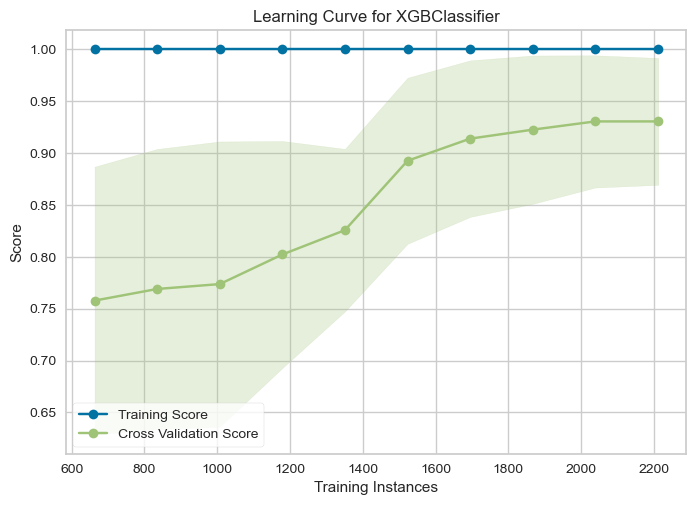

In [57]:
smote.plot_model(penalize_xg, plot='learning')

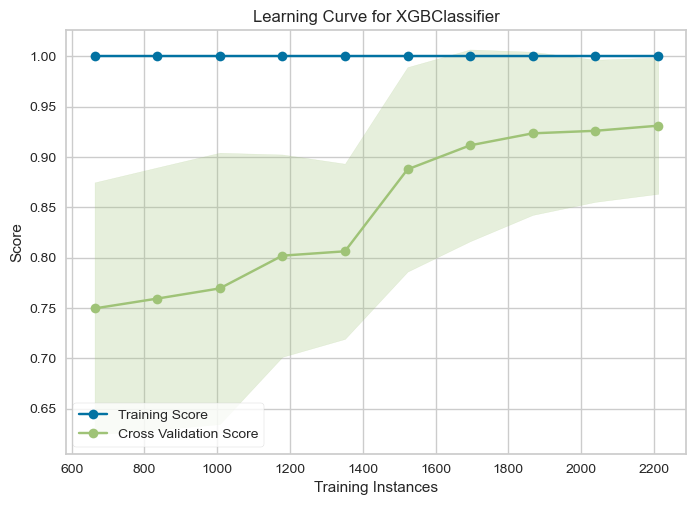

In [58]:
smote.plot_model(nearmiss_xg, plot='learning')

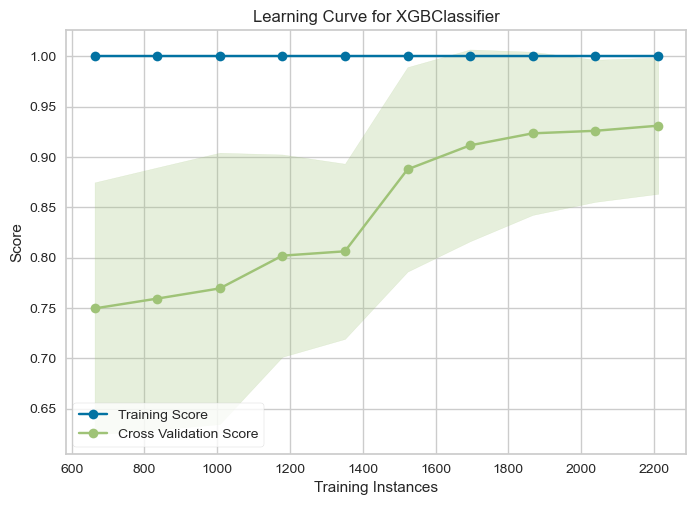

In [59]:
smote.plot_model(smote_xg, plot='learning')

In [85]:
# Setup Pycaret
clf = setup(data = df_seen, target = 'Churn')

# Train the model
xgboost = create_model('xgboost')

# Predict on unseen data
predictions = predict_model(xgboost, data=df_unseen)

# Calculate F-beta score
from sklearn.metrics import fbeta_score
fbeta_score(predictions['Churn'], predictions['Predictions'], beta=2)


,Description,Value
0,Session id,1548
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(2084, 11)"
4,Transformed data shape,"(2084, 16)"
5,Transformed train set shape,"(1458, 16)"
6,Transformed test set shape,"(626, 16)"
7,Numeric features,8
8,Categorical features,2
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8767,0.9041,0.6000,0.6522,0.6250,0.5514,0.5521
1,0.9178,0.9494,0.6000,0.8824,0.7143,0.6683,0.6853
2,0.9110,0.9028,0.6800,0.7727,0.7234,0.6706,0.6725
3,0.9178,0.9560,0.6400,0.8421,0.7273,0.6799,0.6888
4,0.8904,0.9035,0.6800,0.6800,0.6800,0.6139,0.6139
5,0.9452,0.9458,0.7692,0.9091,0.8333,0.8008,0.8048
6,0.9452,0.9619,0.6923,1.0000,0.8182,0.7872,0.8056
7,0.9041,0.9179,0.6154,0.8000,0.6957,0.6399,0.6476
8,0.9517,0.9800,0.8400,0.8750,0.8571,0.8281,0.8284


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9100,0.9288,0.6818,0.7595,0.7186,0.6652,0.6665


KeyError: 'Predictions'